In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df=pd.read_csv('online_shoppers_intention.csv')

In [28]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [29]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [30]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [31]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [32]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [33]:
df.shape

(12330, 18)

In [34]:
len(df.columns)

18

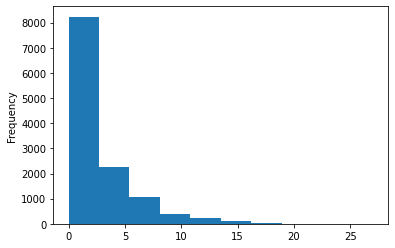

In [35]:
#plotting histogram
df.Administrative.plot(kind='hist')

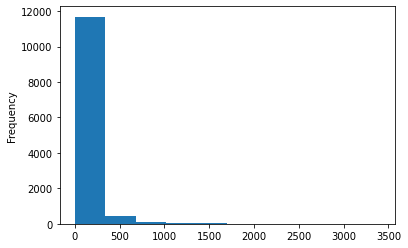

In [36]:
df.Administrative_Duration.plot(kind='hist')

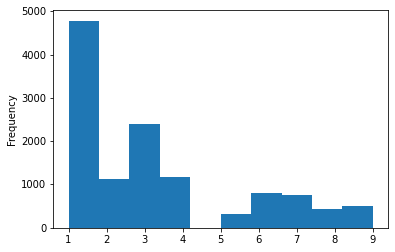

In [37]:
df.Region.plot(kind='hist')


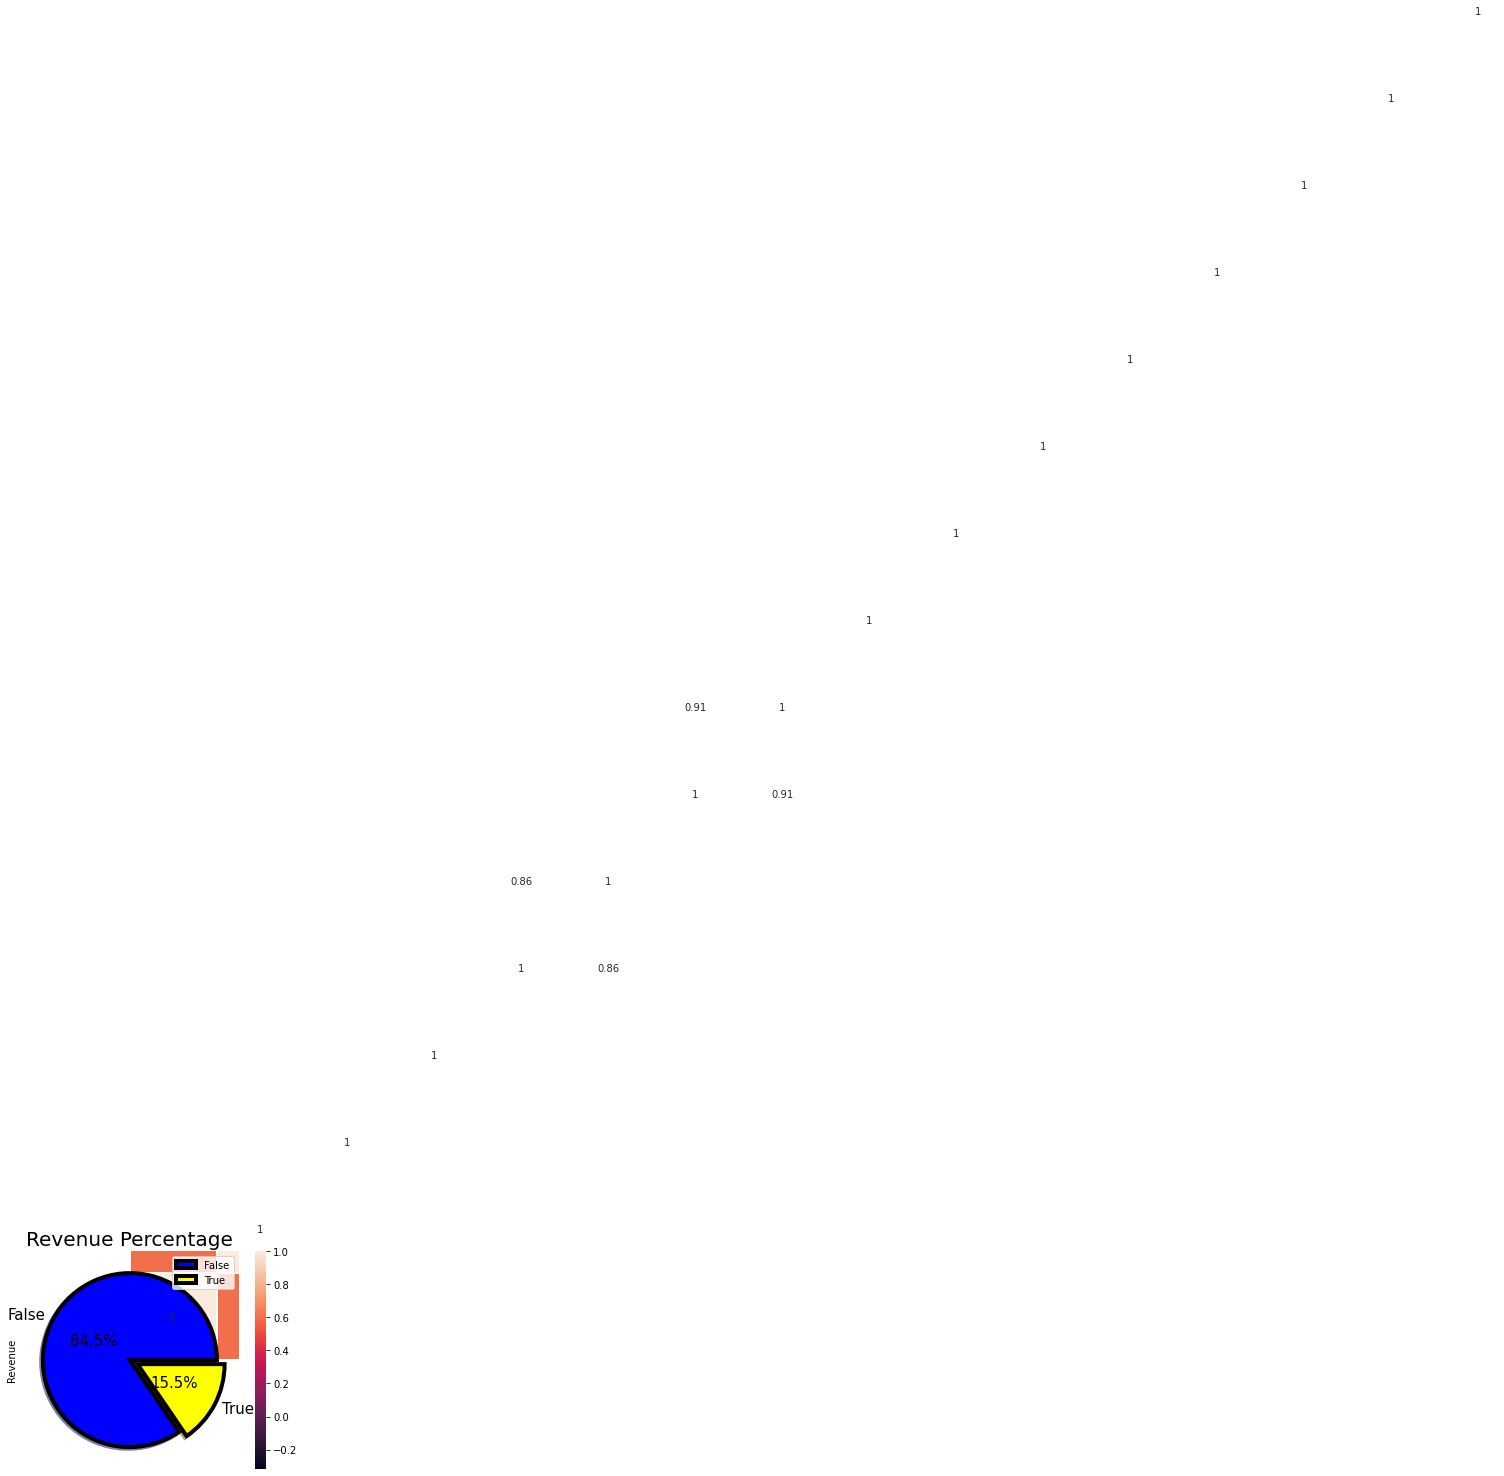

In [38]:
sns.heatmap(df.corr(),annot=True,linewidth=1.5)
df.Revenue.value_counts().plot.pie(autopct="%.1f%%",colors=['blue','yellow'],explode=(0,0.1), pctdistance=0.47,
                 shadow= True,textprops = {"fontsize":15},wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"})
plt.title('Revenue Percentage',fontsize=20)
plt.legend()
plt.show()

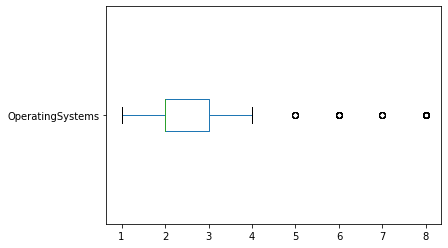

In [39]:
df.OperatingSystems.plot(kind='box',vert=False)


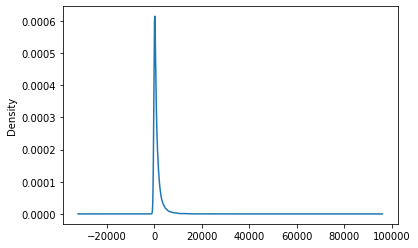

In [43]:
df.ProductRelated_Duration.plot(kind='density')


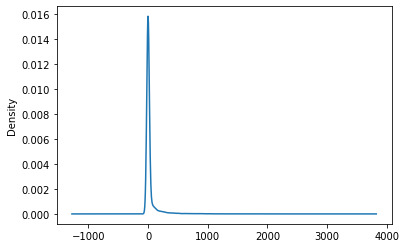

In [44]:
df.Informational_Duration.plot(kind='density')


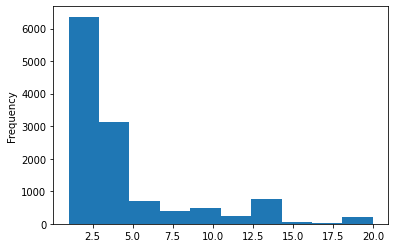

In [45]:
df.TrafficType.plot(kind='hist')

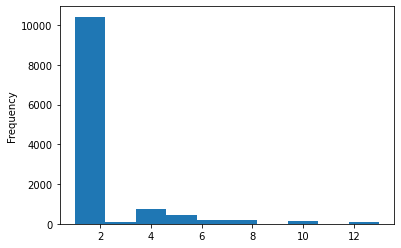

In [46]:
df.Browser.plot(kind='hist')

In [47]:
#checking the columns
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [48]:
from scipy.stats import ttest_ind

In [49]:
df.Weekend.value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [51]:
df.Weekend.groupby(df.Revenue).mean()

Revenue
False    0.227308
True     0.261530
Name: Weekend, dtype: float64

In [52]:
no=df[df.Revenue==0]
yes=df[df.Revenue==1]

In [53]:
ttest_ind(no.Weekend,yes.Weekend,equal_var=False)
# SINCE pvalue=0.0016585421 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

Ttest_indResult(statistic=-3.1487315625453247, pvalue=0.001658542151602163)

In [54]:
from scipy.stats import f_oneway


In [55]:
df.VisitorType.value_counts()


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [56]:
df.Administrative.groupby(df.VisitorType).mean()


VisitorType
New_Visitor          2.551948
Other                1.470588
Returning_Visitor    2.283954
Name: Administrative, dtype: float64

In [57]:
A=df[df.VisitorType=='New_Visitor']
B=df[df.VisitorType=='Other']
C=df[df.VisitorType=='Returning_Visitor']

In [58]:
f_oneway(A.Administrative,B.Administrative,C.Administrative)
## SINCE pvalue=0.0005420192534918692 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

F_onewayResult(statistic=7.52479867892518, pvalue=0.0005420192534918692)

In [59]:
df.OperatingSystems.groupby(df.VisitorType).mean()


VisitorType
New_Visitor          2.027745
Other                5.823529
Returning_Visitor    2.109658
Name: OperatingSystems, dtype: float64

In [60]:
A=df[df.VisitorType=='New_Visitor']
B=df[df.VisitorType=='Other']
C=df[df.VisitorType=='Returning_Visitor']

In [61]:
f_oneway(A.OperatingSystems,B.OperatingSystems,C.OperatingSystems)
## SINCE pvalue=0.0 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

F_onewayResult(statistic=803.7430549279885, pvalue=0.0)

In [62]:
from scipy.stats import chi2_contingency


In [64]:
chi2_contingency(pd.crosstab(df.Revenue,df.VisitorType))
## SINCE pvalue= 4.269904152293867e-30 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

(135.2519228192047,
 4.269904152293867e-30,
 2,
 array([[1431.86277372,   71.84671533, 8918.29051095],
        [ 262.13722628,   13.15328467, 1632.70948905]]))

In [65]:
chi2_contingency(pd.crosstab(df.Revenue,df.Weekend))
## SINCE pvalue= 0.00126632 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and weekend

(10.390978319534856,
 0.0012663251061221968,
 1,
 array([[7997.80729927, 2424.19270073],
        [1464.19270073,  443.80729927]]))

In [66]:
df['Revenue'] = df['Revenue'].astype(int)
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [67]:
df['Weekend'] = df['Weekend'].astype(int)
df['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [68]:
df = pd.get_dummies(data = df, columns=['Month', 'VisitorType'], drop_first=True)
df.shape

(12330, 27)

In [69]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,1


In [70]:
# Split Data into DependentVariable(y) & Independent Variables (X)
y=df.Revenue
X=df.drop('Revenue',axis=1)

In [71]:
from sklearn.linear_model import LogisticRegression


In [72]:
#short name and giving iterations
logreg=LogisticRegression(max_iter=10000)

In [73]:
#model building
logregmodel=logreg.fit(X,y)

In [74]:
#R-Square
logregmodel.score(X,y)

0.8834549878345499

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
#cross validation and mean
np.mean(cross_val_score(logreg,X,y,cv=5))

0.8802108678021086

In [77]:
#predicting the data
logitpredict=logregmodel.predict(X)

In [78]:
#Confusion Matrix
pd.crosstab(y, logitpredict)

col_0,0,1
Revenue,,
0,10174,248
1,1189,719


In [79]:
#classification report
from sklearn.metrics import classification_report

In [80]:
#print the classification report of the model
print(classification_report( y, logitpredict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93     10422
           1       0.74      0.38      0.50      1908

    accuracy                           0.88     12330
   macro avg       0.82      0.68      0.72     12330
weighted avg       0.87      0.88      0.87     12330



In [81]:
#Importing the smote algorithm to  balance the dataset
from imblearn.over_sampling import SMOTE

In [82]:
smote=SMOTE()


In [83]:
X_smote,y_smote=smote.fit_resample(X,y)


In [84]:
print(X_smote.shape)


(20844, 26)


In [85]:
logit_smote=logreg.fit(X_smote,y_smote)


In [86]:
logit_smote.score(X_smote,y_smote)


0.8886010362694301

In [87]:
#CROSS VALIDATION AND MEAN 
np.mean(cross_val_score(logreg,X_smote,y_smote,cv=5))

0.7865622851970651

In [88]:
logit_smote_predict=logit_smote.predict(X_smote)


In [89]:
#classification report after imbalancing the dataset
print(classification_report(y_smote,logit_smote_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10422
           1       0.91      0.87      0.89     10422

    accuracy                           0.89     20844
   macro avg       0.89      0.89      0.89     20844
weighted avg       0.89      0.89      0.89     20844



In [90]:
from sklearn.metrics import plot_roc_curve


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


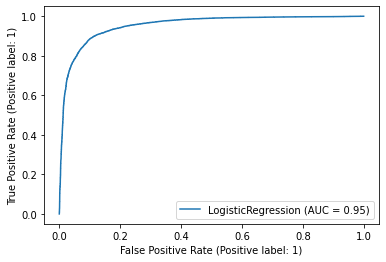

In [91]:
plot_roc_curve(logreg,X_smote,y_smote)


In [92]:
from sklearn.tree import DecisionTreeClassifier


In [93]:
#SHORT NAME
tree=DecisionTreeClassifier(max_depth=3)

In [94]:
#MODEL BUILDING
treemodel=tree.fit(X_smote,y_smote)

In [95]:
#R-SQUARE 
treemodel.score(X_smote,y_smote)

0.8998272884283247

In [96]:
#CROSS VALIDATION AND MEAN 
np.mean(cross_val_score(tree,X_smote,y_smote,cv=5))

0.8729608770336214

In [97]:
#PREDICTING THE MODEL 
treepredict=treemodel.predict(X_smote)

In [98]:
#PRINTING THE CLASSIFICATION REPORT FOR ANALYSIS
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10422
           1       0.90      0.89      0.90     10422

    accuracy                           0.90     20844
   macro avg       0.90      0.90      0.90     20844
weighted avg       0.90      0.90      0.90     20844



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


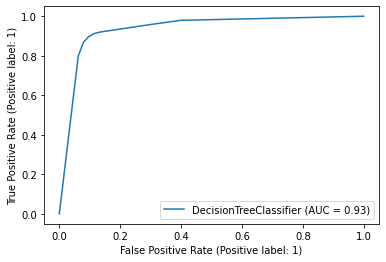

In [99]:
#Plotting the roc curve to find true positive rate and false positive rate for a predictive model
plot_roc_curve(tree,X_smote,y_smote)

In [100]:
#Confusion Matrix
pd.crosstab(y_smote,treepredict)

col_0,0,1
Revenue,,
0,9431,991
1,1097,9325


In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
#short name and giving estimators
RF=RandomForestClassifier(n_estimators=1000)

In [103]:
#model building
RFmodel=RF.fit(X_smote,y_smote)

In [104]:
#r-square
RFmodel.score(X_smote,y_smote)

1.0

In [105]:
#cross validation and the mean
np.mean(cross_val_score(RF,X_smote,y_smote,cv=5))

0.9028986224528083

In [106]:
#predicting the data
RFpredict=RFmodel.predict(X_smote)

In [107]:
#classification report  for better analysis
print(classification_report(y_smote,RFpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10422
           1       1.00      1.00      1.00     10422

    accuracy                           1.00     20844
   macro avg       1.00      1.00      1.00     20844
weighted avg       1.00      1.00      1.00     20844



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


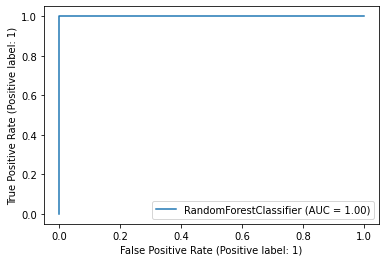

In [108]:
#plotting ROC curve
plot_roc_curve(RF,X_smote,y_smote)

In [109]:
#Confusion Matrix
pd.crosstab(y_smote,RFpredict)

col_0,0,1
Revenue,,
0,10422,0
1,0,10422


In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
#short name and giving estimators 
gbm=GradientBoostingClassifier(n_estimators=2000)

In [112]:
#model building
gbmmodel=gbm.fit(X_smote,y_smote)

In [113]:
# R-Square
gbmmodel.score(X_smote,y_smote)

0.9842160813663404

In [114]:
#crossvalidation and mean
np.mean(cross_val_score(gbm,X_smote,y_smote,cv=5))

0.8810224354975418

In [115]:
#Predicting the model
gbmpredict=gbmmodel.predict(X_smote)

In [116]:
#Classification Report
print(classification_report(y_smote,gbmpredict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10422
           1       0.99      0.98      0.98     10422

    accuracy                           0.98     20844
   macro avg       0.98      0.98      0.98     20844
weighted avg       0.98      0.98      0.98     20844



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


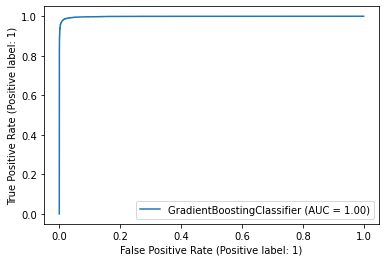

In [117]:
#plotting ROC curve
plot_roc_curve(gbm,X_smote,y_smote)

In [118]:
#Confusion Matrix
pd.crosstab(y_smote,gbmpredict)

col_0,0,1
Revenue,,
0,10283,139
1,190,10232


In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
#short name 
NB=GaussianNB()

In [121]:
#model building
NBmodel=NB.fit(X_smote,y_smote)

In [122]:
# R-Square
NBmodel.score(X_smote,y_smote)

0.8096814431011322

In [123]:
#cross validation score and the mean
np.mean(cross_val_score(NB,X_smote,y_smote,cv=5))

0.652418729964195

In [124]:
#Predicting the model
NBpredict=NBmodel.predict(X_smote)

In [125]:
#Classification report for analysis
print(classification_report(y_smote,NBpredict))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79     10422
           1       0.76      0.90      0.83     10422

    accuracy                           0.81     20844
   macro avg       0.82      0.81      0.81     20844
weighted avg       0.82      0.81      0.81     20844



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


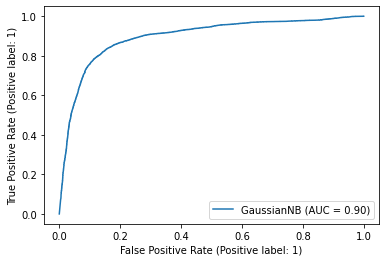

In [126]:
#Plotting roc curve
plot_roc_curve(NB,X_smote,y_smote)

In [127]:
#Confusion Matrix
pd.crosstab(y_smote,NBpredict)

col_0,0,1
Revenue,,
0,7446,2976
1,991,9431


In [128]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [129]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [130]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

In [131]:
ss=StandardScaler()

In [132]:
X_ss=ss.fit_transform(X_smote)

In [133]:
#parameters
param={'n_neighbors':range(1,50),'weights':['uniform','distance']}

In [134]:
#short name
grid=GridSearchCV(KNeighborsClassifier(),param)

In [135]:
#model building
gridmodel=grid.fit(X_smote,y_smote)

In [136]:
#best parameters
gridmodel.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [137]:
#short name
kn=KNeighborsClassifier(n_neighbors=10,weights='uniform')

In [138]:
#model building
knmodel=kn.fit(X_ss,y_smote)

In [139]:
#R-square
knmodel.score(X_ss,y_smote)

0.9028497409326425

In [140]:
#Pedicting the model
knpredict=knmodel.predict(X_ss)

In [141]:
#cross tabulation of y and predicted variable
pd.crosstab(y_smote,knpredict)

col_0,0,1
Revenue,,
0,9643,779
1,1246,9176


In [142]:
#cross validation and mean
np.mean(cross_val_score(kn,X_ss,y_smote,cv=5))

0.7712568524006594

In [143]:
#classification report for analysis
print(classification_report(y_smote,knpredict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.90     10422
           1       0.92      0.88      0.90     10422

    accuracy                           0.90     20844
   macro avg       0.90      0.90      0.90     20844
weighted avg       0.90      0.90      0.90     20844



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


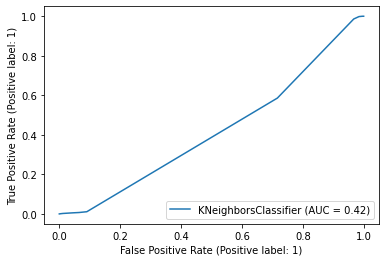

In [144]:
#Plotting roc curve
plot_roc_curve(kn,X_smote,y_smote)

In [145]:
from sklearn.neural_network import MLPClassifier


In [146]:
mlp= MLPClassifier()

In [147]:
mlp_model=mlp.fit(X_smote,y_smote)


In [148]:
mlp.score(X_smote,y_smote)


0.8406735751295337

In [149]:
#cross validation and mean
np.mean(cross_val_score(mlp,X_smote,y_smote,cv=5))


0.7624302099077875

In [150]:
#Pedicting the model
mlppredict=mlp_model.predict(X_smote)

In [151]:
#cross tabulation of y and predicted variable
pd.crosstab(y_smote,mlppredict)

col_0,0,1
Revenue,,
0,10080,342
1,2979,7443


In [152]:
#classification report for analysis
print(classification_report(y_smote,mlppredict))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     10422
           1       0.96      0.71      0.82     10422

    accuracy                           0.84     20844
   macro avg       0.86      0.84      0.84     20844
weighted avg       0.86      0.84      0.84     20844



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


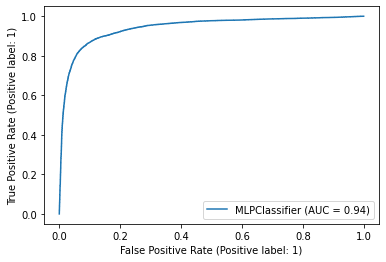

In [153]:
#Plotting roc curve
plot_roc_curve(mlp,X_smote,y_smote)

In [154]:
#support vector machine
from sklearn.svm import SVC

In [155]:
#short name
svc=SVC()

In [156]:
#model building
svcmodel=svc.fit(X_smote,y_smote)

In [157]:
#R-square
svcmodel.score(X_smote,y_smote)

0.7383419689119171

In [158]:
svcpredict=svcmodel.predict(X_smote)

In [159]:
#cross tabulation of y and predicted variable
pd.crosstab(y_smote,svcpredict)

col_0,0,1
Revenue,,
0,7765,2657
1,2797,7625


In [160]:
#cross validation score and mean
np.mean(cross_val_score(svc,X_smote,y_smote,cv=5))

0.7280260367054335

In [161]:
#classification report for the model
print(classification_report(y_smote,svcpredict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74     10422
           1       0.74      0.73      0.74     10422

    accuracy                           0.74     20844
   macro avg       0.74      0.74      0.74     20844
weighted avg       0.74      0.74      0.74     20844



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


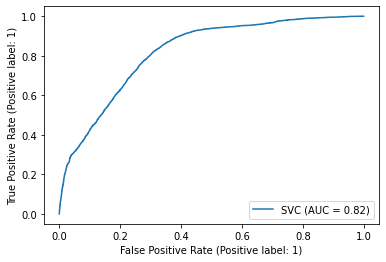

In [162]:
#Plotting roc curve
plot_roc_curve(svc,X_smote,y_smote)

In [ ]:
The Accuracy for Logistic Regression = 71% and AUC = 0.92

The Accuracy for Decision Tree Classifier= 89% and AUC = 0.94

The Accuracy for Random Forest Classifier = 90% and AUC = 1.0

The Accuracy for Gradient Boosting Classifier = 87% and AUC = 1.0

The Accuracy for Gaussian Naive Bayes = 55% and AUC = 0.85

The Accuracy for Multi Layer Perception = 72% and AUC = 0.93

The Accuracy for KNeighbours Classifier = 72% and AUC = 0.47

The Accuracy for Support Vector Machines = 73% and AUC = 0.82

BASED ON THE ACCURACY WE CAN SAY THAT THE BEST MODEL IS RANDOM FOREST CLASSIFIER FOR THIS DATASET